In [1]:
import torch
import spectral_chisel

In [2]:
n = m = 4096
mat = torch.normal(0, 1, (n, m)).cuda()

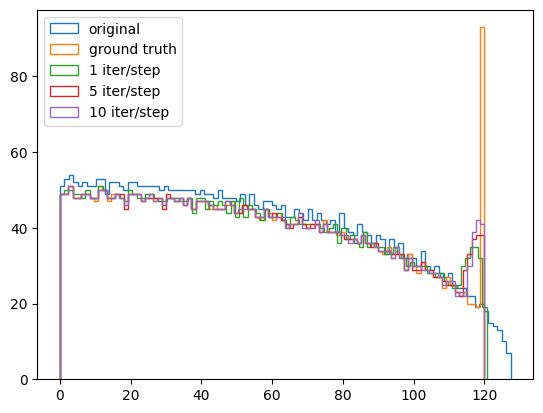

In [3]:
import matplotlib.pyplot as plt

cap = 120
d = {}

with torch.no_grad():
    original = torch.linalg.svdvals(mat).cpu()

    U, S, Vh = torch.linalg.svd(mat)
    ground_truth = torch.clamp(S, max=cap).cpu()
    # mat_capped = U @ torch.diag(S_capped) @ Vh
    for i in [1,5,10]:
        hammered = torch.clone(mat)
        sc = spectral_chisel.SpectralChisel(hammered)
        hammered = sc.hammer(hammered, s_max=cap, steps=n, iter_per_step=i)
        d[i] = torch.linalg.svdvals(hammered).cpu()

# Marchenko-Pastur distribution for large n, m:
# https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution
plt.hist(original, bins=100, histtype='step', label='original')

plt.hist(ground_truth, bins=100, histtype='step', label='ground truth')
for i, s in d.items():
    plt.hist(s, bins=100, histtype='step', label=f'{i} iter/step')

plt.legend()
plt.show()

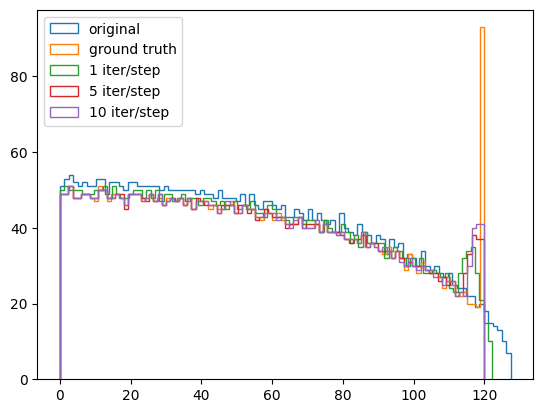

In [4]:
d = {}

with torch.no_grad():
    for i in [1,5,10]:
        hammered = torch.clone(mat)
        sc = spectral_chisel.SpectralChisel(hammered)
        hammered = sc.hammer(hammered, s_max=cap, steps=n // 2, iter_per_step=i)
        d[i] = torch.linalg.svdvals(hammered).cpu()

# Marchenko-Pastur distribution for large n, m:
# https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution
plt.hist(original, bins=100, histtype='step', label='original')

plt.hist(ground_truth, bins=100, histtype='step', label='ground truth')
for i, s in d.items():
    plt.hist(s, bins=100, histtype='step', label=f'{i} iter/step')

plt.legend()
plt.show()

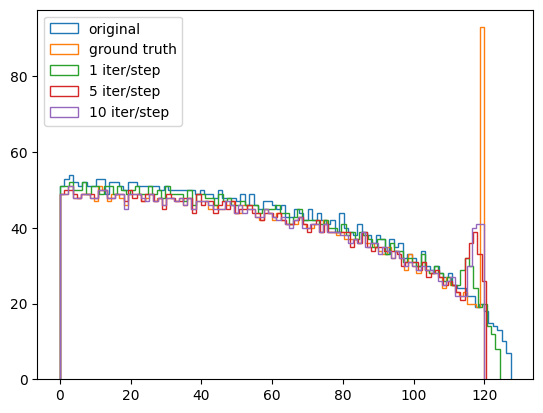

In [5]:
d = {}

with torch.no_grad():
    for i in [1,5,10]:
        hammered = torch.clone(mat)
        sc = spectral_chisel.SpectralChisel(hammered)
        hammered = sc.hammer(hammered, s_max=cap, steps=n // 4, iter_per_step=i)
        d[i] = torch.linalg.svdvals(hammered).cpu()

# Marchenko-Pastur distribution for large n, m:
# https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution
plt.hist(original, bins=100, histtype='step', label='original')

plt.hist(ground_truth, bins=100, histtype='step', label='ground truth')
for i, s in d.items():
    plt.hist(s, bins=100, histtype='step', label=f'{i} iter/step')

plt.legend()
plt.show()

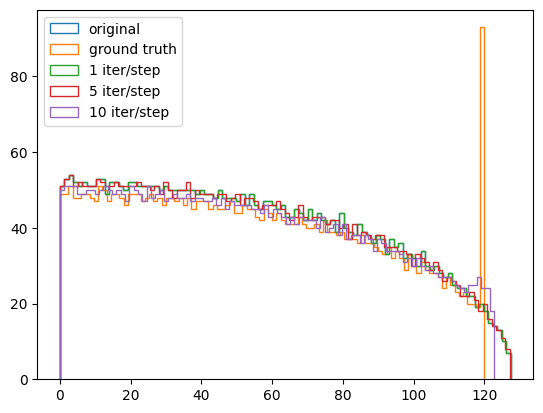

In [6]:
d = {}

with torch.no_grad():
    for i in [1,5,10]:
        hammered = torch.clone(mat)
        for _ in range(n):
            v = torch.normal(0, m**-0.5, (m,)).to(mat)
            v = spectral_chisel.power_iter(hammered, v, i - 1)
            u = hammered @ v
            v = hammered.mT @ u
            v_norm, u_norm = torch.linalg.vector_norm(v), torch.linalg.vector_norm(u)
            v /= v_norm
            u /= u_norm
            spectral_norm = v_norm / u_norm
            hammered -= max(0, spectral_norm - cap) * torch.outer(u, v)
        d[i] = torch.linalg.svdvals(hammered).cpu()

# Marchenko-Pastur distribution for large n, m:
# https://en.wikipedia.org/wiki/Marchenko%E2%80%93Pastur_distribution
plt.hist(original, bins=100, histtype='step', label='original')

plt.hist(ground_truth, bins=100, histtype='step', label='ground truth')
for i, s in d.items():
    plt.hist(s, bins=100, histtype='step', label=f'{i} iter/step')

plt.legend()
plt.show()

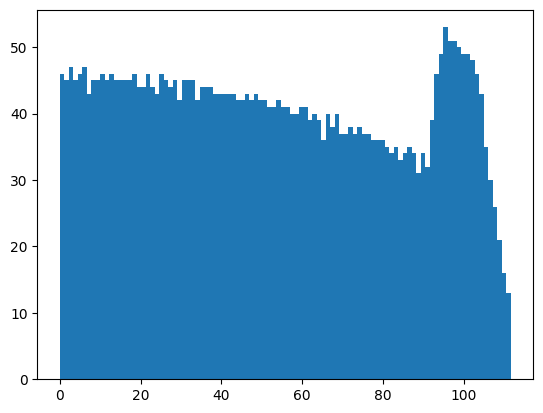

In [7]:
with torch.no_grad():
    decayed = torch.clone(mat)
    sc = spectral_chisel.SpectralChisel(decayed)
    decayed = sc.decay(decayed, wd=0.01, steps=n)
    s_decayed = torch.linalg.svdvals(decayed).cpu()

plt.hist(s_decayed, bins=100)
plt.show()